**BURDA İŞLENEN GÖRSELLERİN ÜZERİNDE VGG16 MODELİ KULLANILDI (orijinal mimari)**

In [1]:
from google.colab import files
uploaded = files.upload()


Saving EyeDiseases_pseudo.zip to EyeDiseases_pseudo.zip


**ayıkladim**

In [2]:

!unzip -l "/content/EyeDiseases_pseudo.zip"
!unzip -q "/content/EyeDiseases_pseudo.zip" -d /content/islenendosya



Archive:  /content/EyeDiseases_pseudo.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2025-05-05 13:13   CNV/
        0  2025-05-05 13:13   DME/
        0  2025-05-05 13:13   DRUSEN/
        0  2025-05-05 13:13   NORMAL/
   152197  2025-05-05 13:13   DME/jet_DME-6884821-36.jpeg
   142081  2025-05-05 13:13   DME/jet_DME-4634094-51.jpeg
   176159  2025-05-05 13:13   DME/jet_DME-5091309-29.jpeg
   173965  2025-05-05 13:13   DME/jet_DME-4490546-19.jpeg
   652870  2025-05-05 13:13   DME/jet_DME-7767265-4.jpeg
   159827  2025-05-05 13:13   DME/jet_DME-3757443-96.jpeg
   164206  2025-05-05 13:13   DME/jet_DME-8130267-7.jpeg
   205655  2025-05-05 13:13   DME/jet_DME-5225805-3.jpeg
   215055  2025-05-05 13:13   DME/jet_DME-4445075-142.jpeg
    95693  2025-05-05 13:13   DME/jet_DME-8525575-30.jpeg
   161629  2025-05-05 13:13   DME/jet_DME-2388519-10.jpeg
   157096  2025-05-05 13:13   DME/jet_DME-8421260-1.jpeg
   111136  2025-05-05 13:13   DME/jet_DME-8523253

In [3]:
!ls /content/islenendosya



CNV  DME  DRUSEN  NORMAL


**sınıflardan kontrol ettim**

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [8]:
import os
import shutil
import random

input_root = '/content/islenendosya'
output_root = '/content/split_dataset'
classes = os.listdir(input_root)
split_ratios = {'train': 0.7, 'val': 0.15, 'test': 0.15}

for cls in classes:
    cls_path = os.path.join(input_root, cls)
    images = os.listdir(cls_path)
    random.shuffle(images)

    total = len(images)
    train_count = int(total * split_ratios['train'])
    val_count = int(total * split_ratios['val'])

    splits = {
        'train': images[:train_count],
        'val': images[train_count:train_count+val_count],
        'test': images[train_count+val_count:]
    }

    for split_name, split_imgs in splits.items():
        split_dir = os.path.join(output_root, split_name, cls)
        os.makedirs(split_dir, exist_ok=True)
        for img_name in split_imgs:
            src = os.path.join(cls_path, img_name)
            dst = os.path.join(split_dir, img_name)
            shutil.copyfile(src, dst)

print(" Split işlemi tamamlandı. Rastgele şekilde train/val/test klasörlerine ayrıldı.")


 Split işlemi tamamlandı. Rastgele şekilde train/val/test klasörlerine ayrıldı.


**Split işlemi tamamlandı. Rastgele şekilde train/val/test klasörlerine ayrıldı.**

In [10]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Veri hazırlama
train_dir = "/content/split_dataset/train"
val_dir = "/content/split_dataset/val"
test_dir = "/content/split_dataset/test"

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Model oluşturma
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Önce dondur

x =base_model.output
x =GlobalAveragePooling2D()(x)
x =Dense(128, activation='relu')(x)
x =Dropout(0.5)(x)
output= Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

#Eğitim
early_stop = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stop]
)




Found 560 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Found 120 images belonging to 4 classes.
Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 424s 23s/step - accuracy: 0.2328 - loss: 2.0210 - val_accuracy: 0.2417 - val_loss: 1.5570
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 411s 24s/step - accuracy: 0.2213 - loss: 1.7031 - val_accuracy: 0.2583 - val_loss: 1.4322
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 401s 22s/step - accuracy: 0.2021 - loss: 1.6596 - val_accuracy: 0.2250 - val_loss: 1.3879
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 420s 24s/step - accuracy: 0.3027 - loss: 1.4857 - val_accuracy: 0.2667 - val_loss: 1.3704
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 402s 23s/step - accuracy: 0.2306 - loss: 1.5134 - val_accuracy: 0.3417 - val_loss: 1.3613
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 401s 22s/step - accuracy: 0.2144 - loss: 1.5191 - val_accuracy: 0.4500 - val_loss: 1.3525
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 413s 23s/step - accuracy: 0.2827 - loss: 1.4898 - val_accuracy: 0.4333 

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy'][:15]) + 1
print(f" (ilk 15 epoch içinde): {best_epoch}")

Best epoch: 19


**15 epoklarındaki  en yüksek validasyon oranına sahip epoch'u yakaladık ve kaydettik**

***EN YÜKSEK VALİDASYON ORANI : 0.58**

NOT : burda 20 epok boyunca eğittim ama karşılaştırmak için sadece 15 epok  alacağız çünkü diğer mimaride 15 epok var 

4/4 ━━━━━━━━━━━━━━━━━━━━ 70s 17s/step
Classification Report:
              precision    recall  f1-score   support

         CNV       0.54      0.63      0.58        30
         DME       0.62      0.53      0.57        30
      DRUSEN       0.42      0.33      0.37        30
      NORMAL       0.37      0.43      0.40        30

    accuracy                           0.48       120
   macro avg       0.49      0.48      0.48       120
weighted avg       0.49      0.48      0.48       120



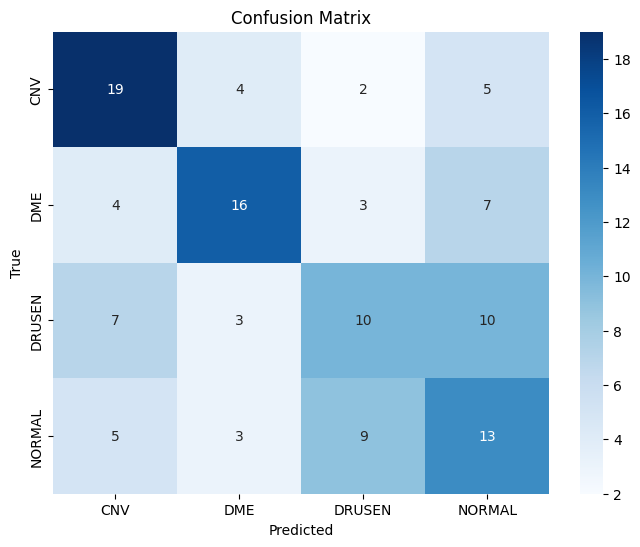

In [14]:

test_generator.reset()
pred_probs = model.predict(test_generator)
pred_classes = np.argmax(pred_probs, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:")
print(classification_report(true_classes, pred_classes, target_names=class_labels))

cm = confusion_matrix(true_classes, pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

**en iyi epoch üzerinde test raporu ve karışıklık matrisi yapıldı**

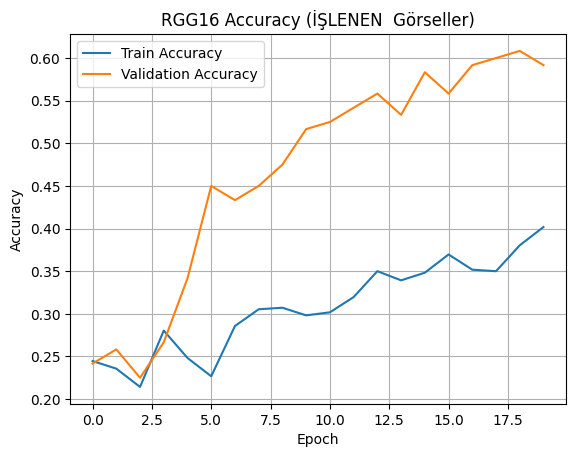

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('RGG16 Accuracy (İŞLENEN  Görseller)')
plt.legend()
plt.grid(True)
plt.show()


**epoklar boyunca performans ve eğitimin nasıl gittiklerini izlemek için bir plot yapıldı**